In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
visa_df = pd.read_csv(r"C:\Users\Acer\OneDrive\Data Science\Data Analysis\Numpy\Visadataset.csv")
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns

In [3]:
wage_data = visa_df['prevailing_wage']

<Axes: xlabel='prevailing_wage', ylabel='Count'>

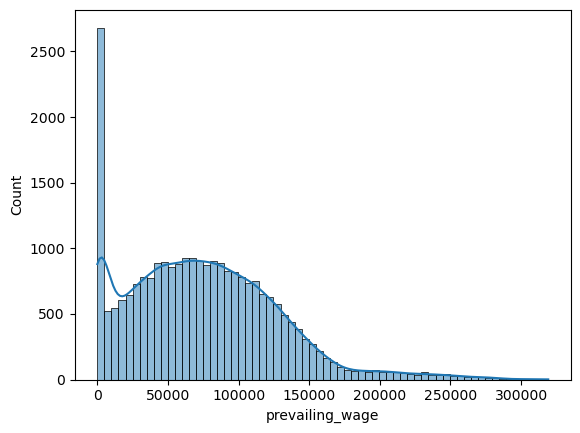

In [4]:
sns.histplot(wage_data,kde=True)

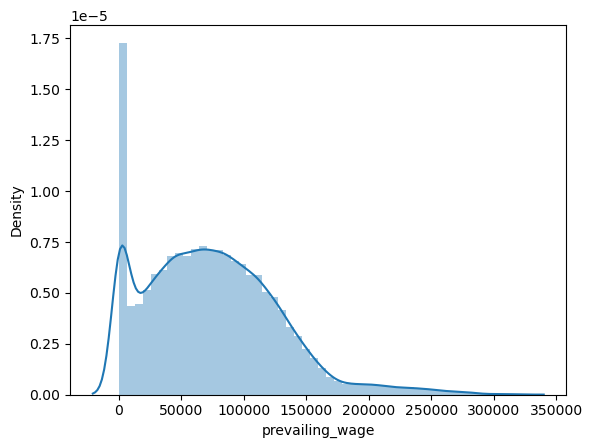

In [10]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(wage_data,kde=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x262b5c90b90>,
 'caps': [<matplotlib.lines.Line2D at 0x262b5c91010>,
 'boxes': [<matplotlib.lines.Line2D at 0x262b5c90890>],
 'medians': [<matplotlib.lines.Line2D at 0x262b5c91430>],
 'fliers': [<matplotlib.lines.Line2D at 0x262b5c91700>],
 'means': []}

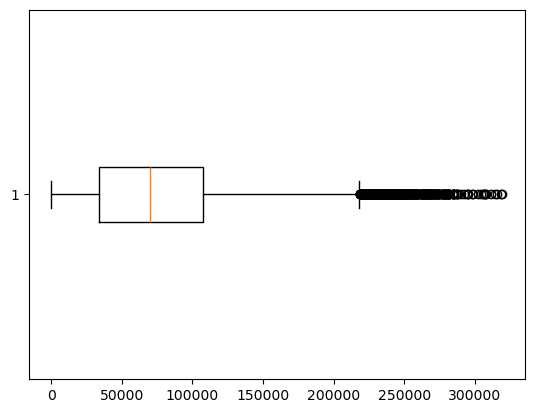

In [12]:
plt.boxplot(wage_data,vert=False)

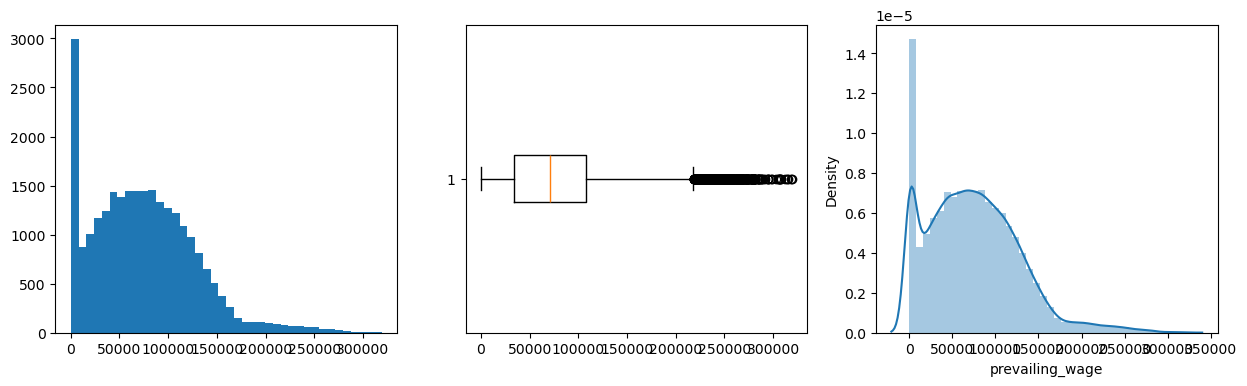

In [26]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,4))
plt.subplot(1,3,1).hist(wage_data,bins=40)
plt.subplot(1,3,2).boxplot(wage_data, vert = False)
plt.subplot(1,3,3)
sns.distplot(wage_data,bins=40)
plt.show()

<Axes: xlabel='prevailing_wage'>

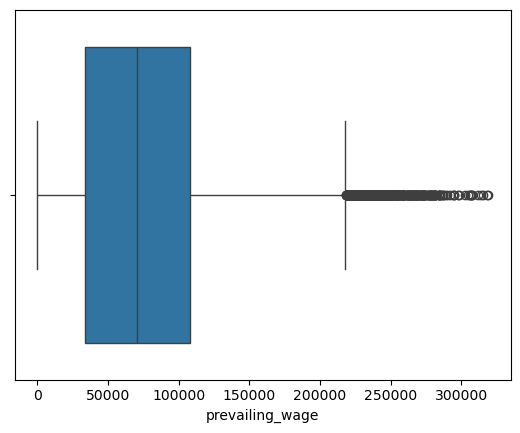

In [15]:
sns.boxplot(wage_data,orient='h')

- find the number of outliers

- Get outliers data and without outliers data`

In [7]:
# Find the number of outliers
q1 = np.percentile(wage_data,25)
q2 = np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
iqr = q3-q1
lb =q1 - 1.5*iqr
ub =q3 + 1.5*iqr
con1 = wage_data<lb
con2 = wage_data>ub
con = con1|con2
outliers_df = visa_df[con]
len(visa_df[con])


427

In [8]:
# Find the number of without outliers
q1 = np.percentile(wage_data,25)
q2 = np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
iqr = q3-q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr
con1 = wage_data>lb
con2 = wage_data<ub
con = con1 & con2
len(visa_df[con])

25053

In [16]:
427*100/(25053+427)

1.6758241758241759

- 1.67 % outliers present in the data

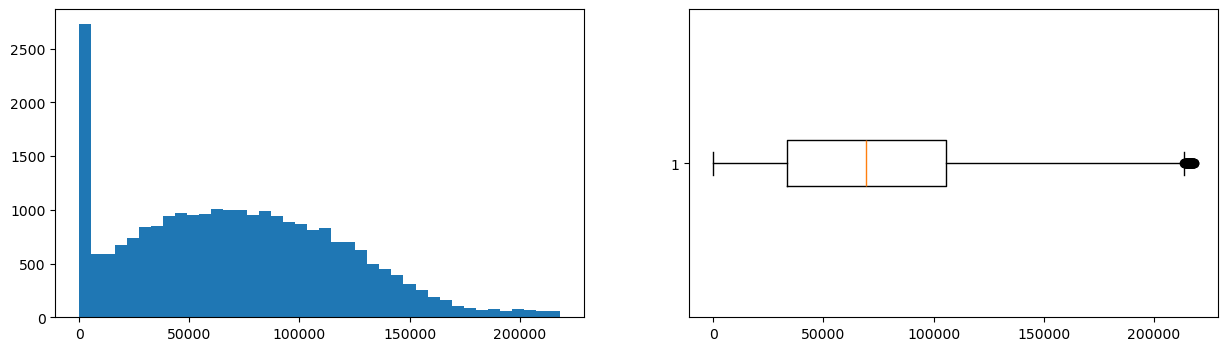

In [9]:
# Draw Boxplot for non-outliers data
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,4))
non_outliers_data = visa_df[con]
plt.subplot(1,2,1).hist((non_outliers_data['prevailing_wage']),bins = 40)
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'], vert =False)
plt.show()

**fill the outliers with median**

In [14]:
# visa_df : 25480
# non_outliers_data : 25053
# outliers_df :427
list1 = []
for i in wage_data:
    if i in outliers_df:
        j = list1.append(np.median(non_outliers_data))
        list1.append(j)
    else:
        list1.append(i)
print(len(list1))

25480
